In [3]:
import pandas as pd
import nltk
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, accuracy_score

In [4]:
nltk.download('punkt')
nltk.download('stopwords')

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\DELL\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\DELL\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [5]:
def load_and_clean_data(file_path):
    df = pd.read_csv(file_path, encoding='ISO-8859-1')
    df = df[['v1', 'v2']]
    df.columns = ['label', 'message']
    return df

In [6]:
def preprocess_data(df):
    label_encoder = LabelEncoder()
    df['label'] = label_encoder.fit_transform(df['label'])
    X_train, X_test, y_train, y_test = train_test_split(df['message'], df['label'], test_size=0.2, random_state=42)
    return X_train, X_test, y_train, y_test

In [7]:
def extract_features(X_train, X_test):
    tfidf_vectorizer = TfidfVectorizer(stop_words='english', max_df=0.7)
    X_train_tfidf = tfidf_vectorizer.fit_transform(X_train)
    X_test_tfidf = tfidf_vectorizer.transform(X_test)
    return X_train_tfidf, X_test_tfidf

In [8]:
def train_model(X_train_tfidf, y_train):
    model = LogisticRegression()
    model.fit(X_train_tfidf, y_train)
    return model

In [9]:
def evaluate_model(model, X_test_tfidf, y_test):
    y_pred = model.predict(X_test_tfidf)
    print("Accuracy:", accuracy_score(y_test, y_pred))
    print("Classification Report:\n", classification_report(y_test, y_pred))

In [10]:
if __name__ == "__main__":
    # File path to the dataset
    file_path = r"C:\Users\DELL\OneDrive\Desktop\Coding\CodSoft_Internship\Spam_Dataset.csv"

In [11]:
df = load_and_clean_data(file_path)

In [12]:
X_train, X_test, y_train, y_test = preprocess_data(df)

In [13]:
X_train_tfidf, X_test_tfidf = extract_features(X_train, X_test)

In [14]:
model = train_model(X_train_tfidf, y_train)

In [15]:
evaluate_model(model, X_test_tfidf, y_test)

Accuracy: 0.9524663677130045
Classification Report:
               precision    recall  f1-score   support

           0       0.95      1.00      0.97       965
           1       0.97      0.67      0.79       150

    accuracy                           0.95      1115
   macro avg       0.96      0.83      0.88      1115
weighted avg       0.95      0.95      0.95      1115



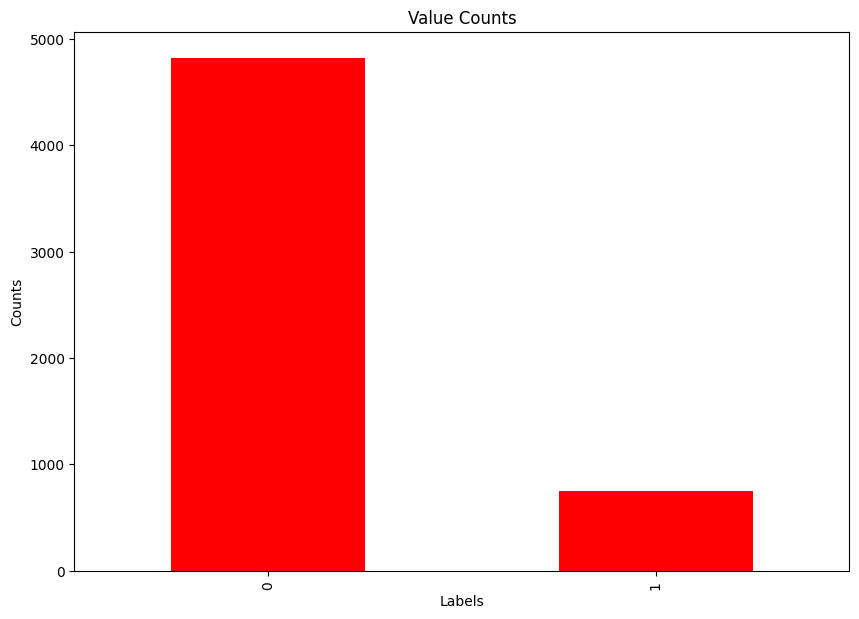

In [16]:
import matplotlib.pyplot as plt

# Plotting the value counts of the labels
df.label.value_counts().plot(kind='bar', figsize=(10, 7), color='red')
plt.title('Value Counts')
plt.xlabel('Labels')
plt.ylabel('Counts')
plt.show()

In [17]:
import matplotlib.pyplot as plt
import seaborn as sns

C:\Users\DELL\AppData\Local\Temp\ipykernel_30692\395419856.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.countplot(x=df.label, palette='viridis')
C:\Users\DELL\AppData\Local\Temp\ipykernel_30692\395419856.py:12: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(['Legitimate', 'Spam'])


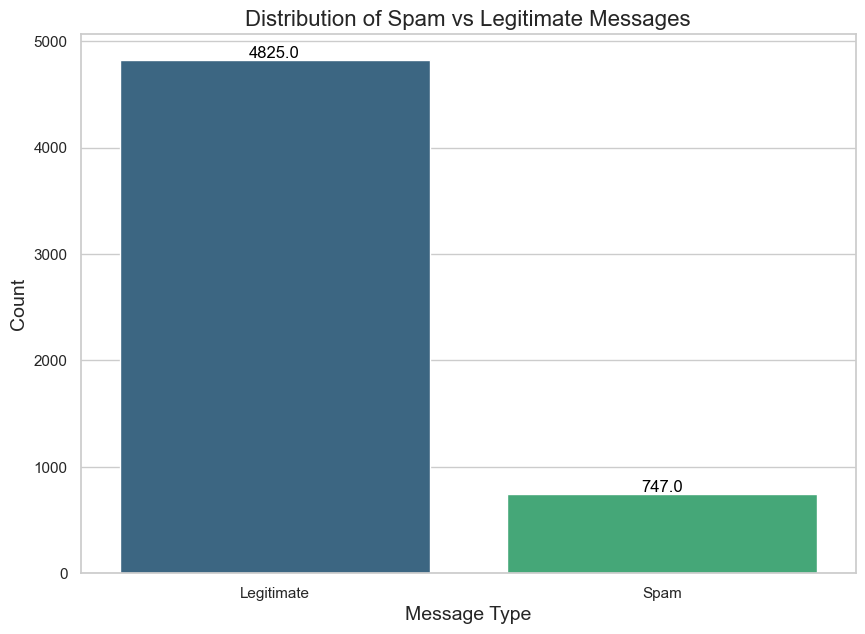

In [18]:
# Set a seaborn style
sns.set(style='whitegrid')

# Plotting the value counts of the labels
plt.figure(figsize=(10, 7))
ax = sns.countplot(x=df.label, palette='viridis')

# Add titles and labels
plt.title('Distribution of Spam vs Legitimate Messages', fontsize=16)
plt.xlabel('Message Type', fontsize=14)
plt.ylabel('Count', fontsize=14)
ax.set_xticklabels(['Legitimate', 'Spam'])

# Annotate the bars with the count values
for p in ax.patches:
    ax.annotate(f'{p.get_height()}', (p.get_x() + p.get_width() / 2., p.get_height()), 
                ha='center', va='center', fontsize=12, color='black', xytext=(0, 5), 
                textcoords='offset points')

# Show the plot
plt.show()

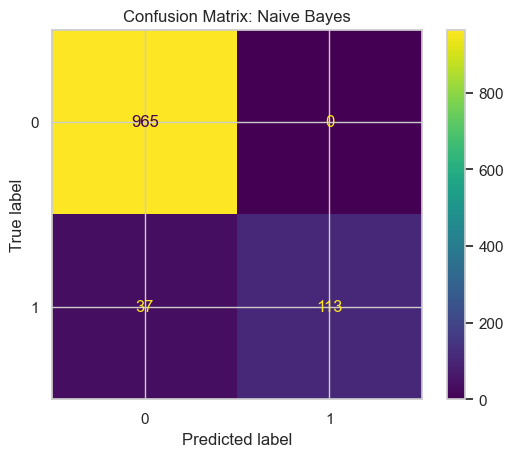

In [19]:
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import ConfusionMatrixDisplay

# Using Naive Bayes
naiv_bayes = MultinomialNB()
naiv_bayes.fit(X_train_tfidf, y_train)

# Predicting the test set
prediction_nb = naiv_bayes.predict(X_test_tfidf)

# Plotting the confusion matrix
ConfusionMatrixDisplay.from_estimator(naiv_bayes, X_test_tfidf, y_test)
plt.title('Confusion Matrix: Naive Bayes')
plt.show()

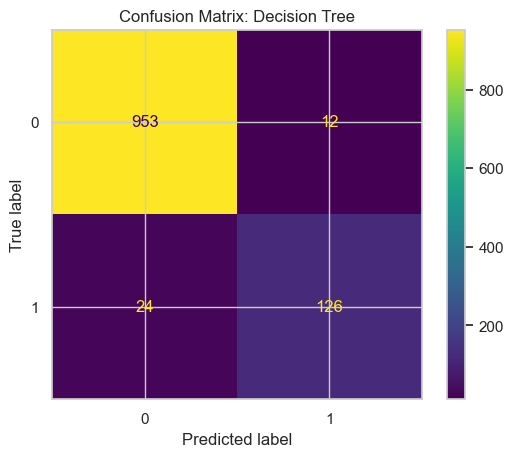

In [20]:
from sklearn.tree import DecisionTreeClassifier

# Using Decision Tree
dt_cls = DecisionTreeClassifier()
dt_cls.fit(X_train_tfidf, y_train)

# Predicting the test set
prediction_dt = dt_cls.predict(X_test_tfidf)

# Plotting the confusion matrix
ConfusionMatrixDisplay.from_estimator(dt_cls, X_test_tfidf, y_test)
plt.title('Confusion Matrix: Decision Tree')
plt.show()

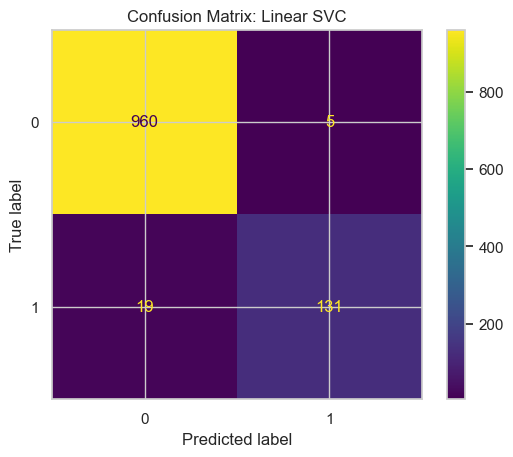

In [21]:
from sklearn.svm import LinearSVC

# Using Linear SVC
lsvc = LinearSVC()
lsvc.fit(X_train_tfidf, y_train)

# Predicting the test set
prediction_svc = lsvc.predict(X_test_tfidf)

# Plotting the confusion matrix
ConfusionMatrixDisplay.from_estimator(lsvc, X_test_tfidf, y_test)
plt.title('Confusion Matrix: Linear SVC')
plt.show()

C:\Users\DELL\AppData\Local\Temp\ipykernel_30692\395419856.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.countplot(x=df.label, palette='viridis')
C:\Users\DELL\AppData\Local\Temp\ipykernel_30692\395419856.py:12: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(['Legitimate', 'Spam'])


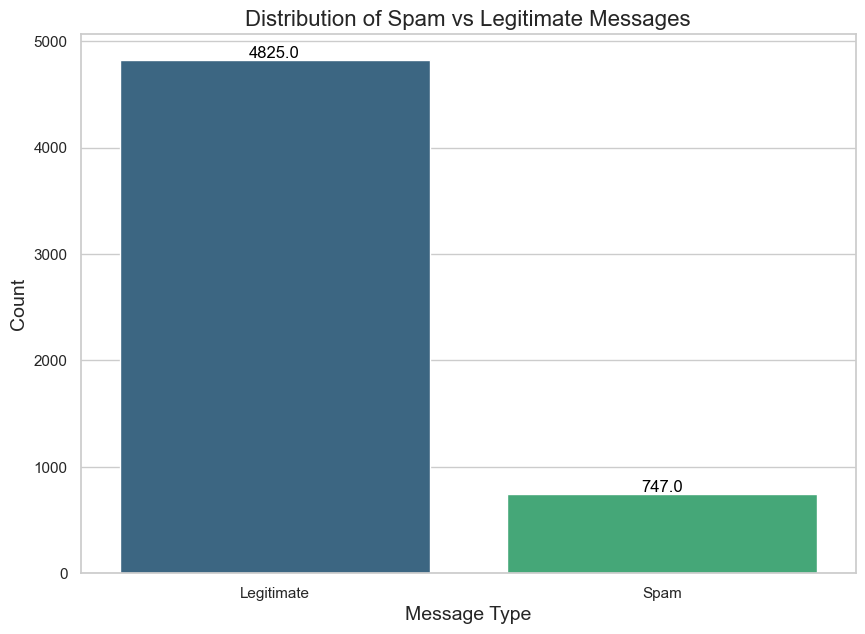

In [22]:
# Set a seaborn style
sns.set(style='whitegrid')

# Plotting the value counts of the labels
plt.figure(figsize=(10, 7))
ax = sns.countplot(x=df.label, palette='viridis')

# Add titles and labels
plt.title('Distribution of Spam vs Legitimate Messages', fontsize=16)
plt.xlabel('Message Type', fontsize=14)
plt.ylabel('Count', fontsize=14)
ax.set_xticklabels(['Legitimate', 'Spam'])

# Annotate the bars with the count values
for p in ax.patches:
    ax.annotate(f'{p.get_height()}', (p.get_x() + p.get_width() / 2., p.get_height()), 
                ha='center', va='center', fontsize=12, color='black', xytext=(0, 5), 
                textcoords='offset points')

# Show the plot
plt.show()

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\DELL\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\DELL\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
C:\Users\DELL\AppData\Local\Temp\ipykernel_30692\2914549224.py:23: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.countplot(x=df.label, palette='viridis')
C:\Users\DELL\AppData\Local\Temp\ipykernel_30692\2914549224.py:29: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(['Legitimate', 'Spam'])


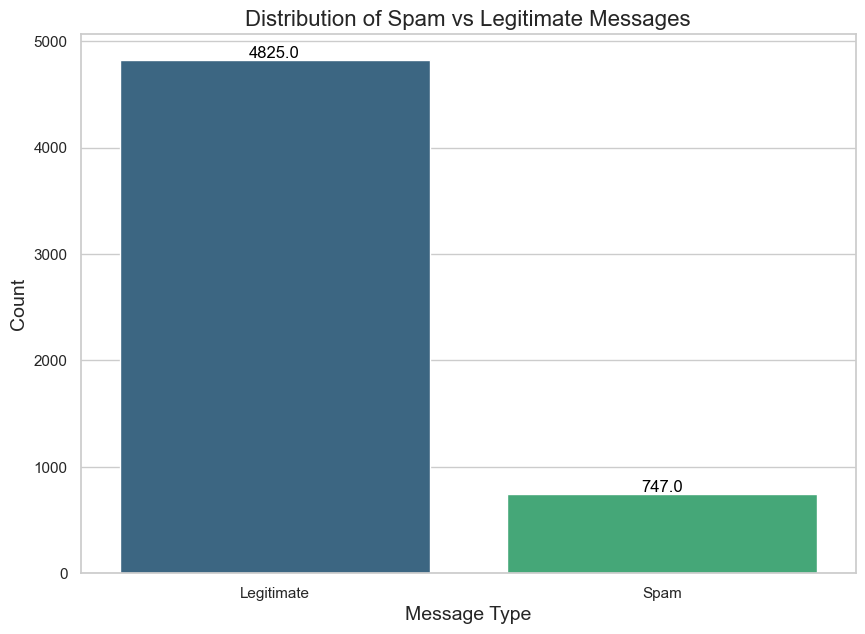

In [23]:
# Download NLTK resources
nltk.download('punkt')
nltk.download('stopwords')

# Load and Clean the Dataset
df = pd.read_csv(r"C:\Users\DELL\OneDrive\Desktop\Coding\CodSoft_Internship\Spam_Dataset.csv", encoding='ISO-8859-1')
df = df[['v1', 'v2']]
df.columns = ['label', 'message']

# Preprocess the Data
label_encoder = LabelEncoder()
df['label'] = label_encoder.fit_transform(df['label'])
X_train, X_test, y_train, y_test = train_test_split(df['message'], df['label'], test_size=0.2, random_state=42)

# Feature Extraction
tfidf_vectorizer = TfidfVectorizer(stop_words='english', max_df=0.7)
X_train_tfidf = tfidf_vectorizer.fit_transform(X_train)
X_test_tfidf = tfidf_vectorizer.transform(X_test)

# Plotting the value counts of the labels
sns.set(style='whitegrid')
plt.figure(figsize=(10, 7))
ax = sns.countplot(x=df.label, palette='viridis')

# Add titles and labels
plt.title('Distribution of Spam vs Legitimate Messages', fontsize=16)
plt.xlabel('Message Type', fontsize=14)
plt.ylabel('Count', fontsize=14)
ax.set_xticklabels(['Legitimate', 'Spam'])

# Annotate the bars with the count values
for p in ax.patches:
    ax.annotate(f'{p.get_height()}', (p.get_x() + p.get_width() / 2., p.get_height()), 
                ha='center', va='center', fontsize=12, color='black', xytext=(0, 5), 
                textcoords='offset points')

# Show the plot
plt.show()